In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
import dedalus.public as d3

import logging
logger = logging.getLogger(__name__)

## Example of nongeostrophic linear stability calculation for idealized bottom frontal zones

In [7]:
from frontal_zone import *

In [8]:
M = 4.427855905235292e-05 # strength of bottom frontal zone (sqrt of horizontal buoyancy gradient)
k = 0. # cross-slope wavenumber (l=0 isolates fastest growing baroclinic mode)

# Setup and solve eigenvalue problem for bottom frontal zone linear instability

Ls = 10. **np.linspace(-5, -2.5, 10)
growth_rates = {}
for nh in [0., 1.]:
    growth_rates[nh] = np.zeros_like(Ls)
    for i, L in enumerate(Ls):
        ds = bottom_frontal_zone_instability(0., 2*np.pi*L, M, nh=nh)
        growth_rates[nh][i] = ds['omega'][ds['idx']].imag

2022-06-22 13:17:04,442 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 7.8e-01/s
2022-06-22 13:17:08,786 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 7.8e-01/s
2022-06-22 13:17:13,247 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 7.2e-01/s
2022-06-22 13:17:17,503 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 7.5e-01/s
2022-06-22 13:17:22,164 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 7.0e-01/s
2022-06-22 13:17:26,617 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 6.9e-01/s
2022-06-22 13:17:30,986 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 8.3e-01/s
2022-06-22 13:17:35,071 subsystems 0/1 INFO :: Building subproblem matrices 

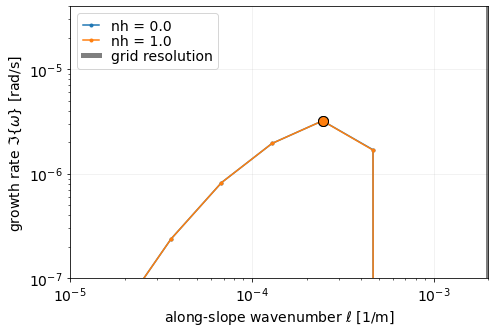

In [11]:
plt.figure(figsize=(7.5,5))
plt.ylim(1e-7, 4e-5)
plt.xlim(1e-5, 2e-3)
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"growth rate $\Im\{\omega\}$ [rad/s]")
plt.xlabel(r"along-slope wavenumber $\ell$ [1/m]")
plt.grid(True, alpha=0.2)

Λ = M**2/f
Ri = N**2/Λ**2

for k,gr in growth_rates.items():
    p = plt.plot(Ls, gr, ".-", label=fr"nh = {k}")
    idx = np.argmax(gr)
    plt.plot(Ls[idx], gr[idx], "o", markeredgecolor="k", color=p[0].get_c(), markersize=10)

plt.axvline(1. /500. - 2.e-5, label="grid resolution", color="k", lw=5, alpha=0.5)
plt.legend(handlelength=1.2, labelspacing=0.08, loc="upper left");